In [1]:
import pandas.util.testing as tm
import time
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import io, base64, os, json, re, glob
import datetime
from datetime import timedelta
import pandas as pd
import pydata_google_auth
import numpy as np

from fbprophet import Prophet
import statsmodels.api as sm

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  """Entry point for launching an IPython kernel.


In [2]:
%matplotlib inline

In [6]:
#data frame import
df_raw= pd.read_csv('/train.csv', index_col=['date'])

# New Section

# New Section

In [7]:
df_raw.head()

,store,item,sales
date,,,
2013-01-01,1,1,13
2013-01-02,1,1,11
2013-01-03,1,1,14
2013-01-04,1,1,13
2013-01-05,1,1,10


In [8]:
df_raw= df_raw.sort_values('date', ascending=True)


Store 2 - All Sales

INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should

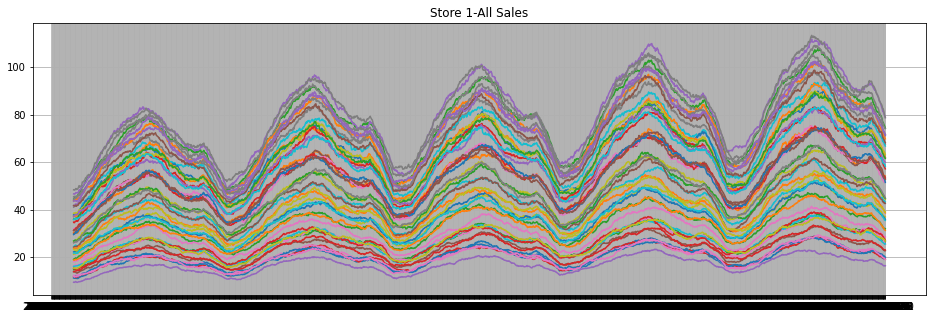

In [17]:
plt.subplots(1, figsize=(16,5))
plt.grid()
plt.title('Store 1-All Sales')
for item in set (df_raw[df_raw['store'] == 1]['item']):
  plt.plot(df_raw[(df_raw['store']==1) & (df_raw['item']==item)]['sales'].rolling(window=50).mean())

INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should

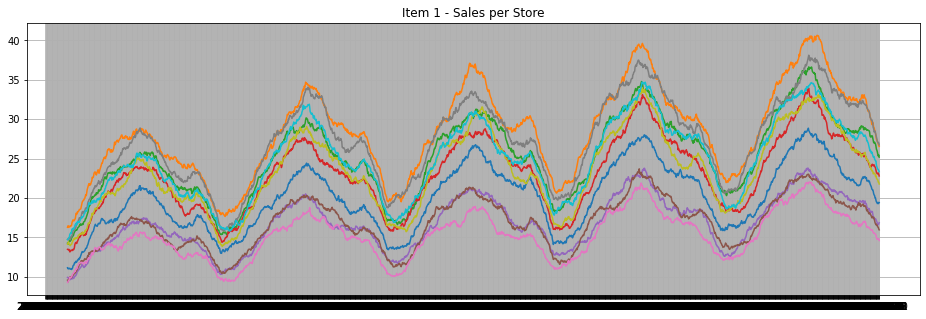

In [18]:
plt.subplots(1, figsize = (16, 5))
plt.grid()
plt.title('Item 1 - Sales per Store')
for store in set(df_raw[df_raw['item'] == 1]['store']):
    plt.plot(df_raw[(df_raw['item'] == 1) & (df_raw['store'] == store)]['sales'].rolling(window=50).mean())

In [19]:
# preparing the data into FBP format:
train_dataset = df_raw[(df_raw['item'] == 1) & df_raw['store'] == 1] 
train_dataset.reset_index(level=0, inplace=True)
train_dataset = train_dataset[['date', 'sales']]
train_dataset.columns = ["ds", "y"]
train_dataset = train_dataset.sample(5000)
prophet_basic = Prophet()
prophet_basic.fit(train_dataset)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [20]:
future= prophet_basic.make_future_dataframe(periods=365)
future

,ds
0,2013-01-01
1,2013-01-02
2,2013-01-03
3,2013-01-04
4,2013-01-05
...,...
2151,2018-12-27
2152,2018-12-28
2153,2018-12-29
2154,2018-12-30


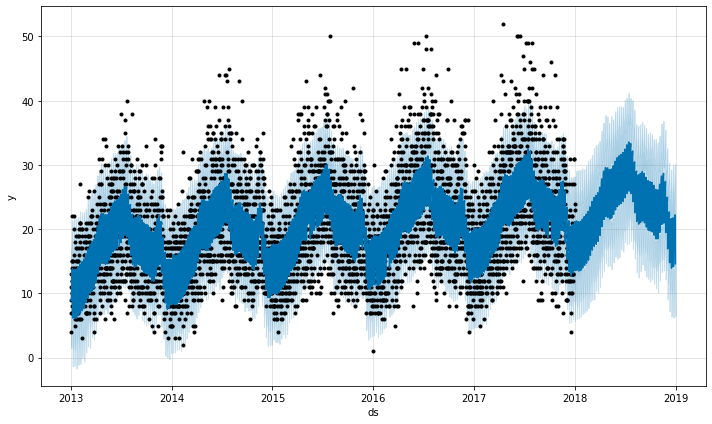

In [21]:
forecast=prophet_basic.predict(future)

#Plotting the predicted data
fig1 =prophet_basic.plot(forecast)

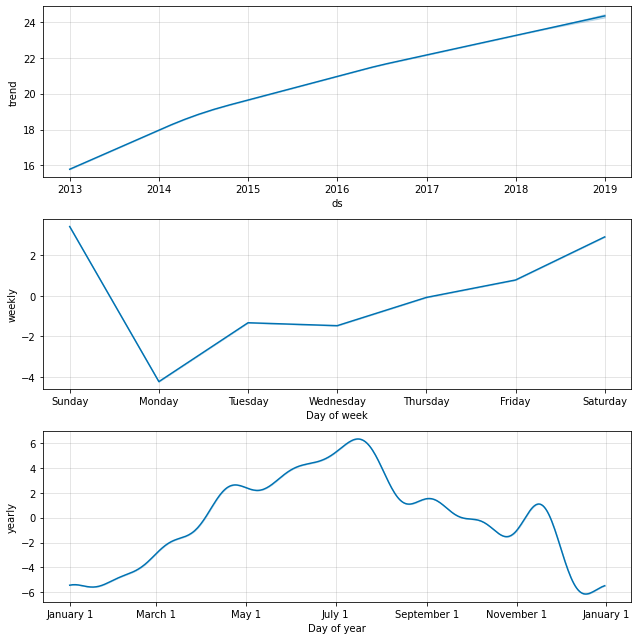

In [22]:
fig1 = prophet_basic.plot_components(forecast)

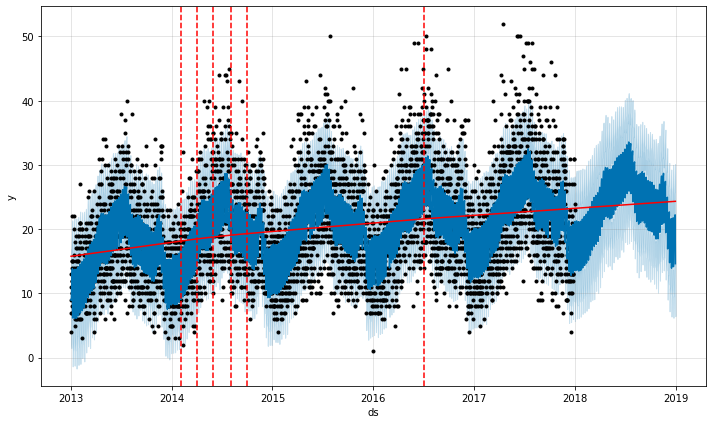

In [23]:
from fbprophet.plot import add_changepoints_to_plot
fig = prophet_basic.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), prophet_basic, forecast)